CHIBUIKE OKOROAMA: C0892150
AML 3104 ASSIGNMENT
DSMM-TERM-3

In [4]:
# Install the skopt package in google colab because BayesSearchCV will be used for hyperparameter tuning of model
!pip install scikit-optimize

In [5]:
# import important libraries for this exercise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
from skopt import BayesSearchCV
import warnings

warnings.filterwarnings('ignore')

In [6]:
#load dataset from the google colab directory
file_path = '/content/train.csv'
data = pd.read_csv(file_path)

**Feature Descriptions**: explains what each feature stands for

sl_no: anonymous id unique to a given employee

gender: employee gender

ssc_p: SSC is Secondary School Certificate (Class 10th). ssc_p is the percentage
of marks secured in Class 10th.

ssc_b: SSC Board. Binary feature.

hsc_p: HSC is Higher Secondary Certificate (Class 12th). hsc_p is the percentage
of marks secured in Class 12th.

hsc_b: HSC Board. Binary feature.

hsc_s: HSC Subject. Feature with three categories.

degree_p: percentage of marks secured while acquiring the degree.

degree_t: branch in which the degree was acquired. Feature with three categories.

workex: Whether the employee has some work experience or not. Binary feature.

etest_p: percentage of marks secured in the placement exam.

specialisation: the specialization that an employee has. Binary feature.

mba_p: percentage of marks secured by an employee while doing his MBA.

status: whether the student was placed or not. Binary Feature. Target variable.

salary: annual compensation at which an employee was hired.

In [7]:
data.head() # display 5 row of dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [8]:
data.info() # display info of dataset and thier data types. dtypes looks good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


In [9]:
data.describe() # display statistics of dataset and spotting missing values based on counts.

,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,0.353488,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,0.479168,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,0.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,0.000000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,0.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,1.000000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,1.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [10]:
print(data.isnull().sum()) # check missing value as spotted from data.describe

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


HANDLING MISSING VALUES IN SALARY
in other to handle missing values i needed to understand the skewness of the feature, in this case SALARY

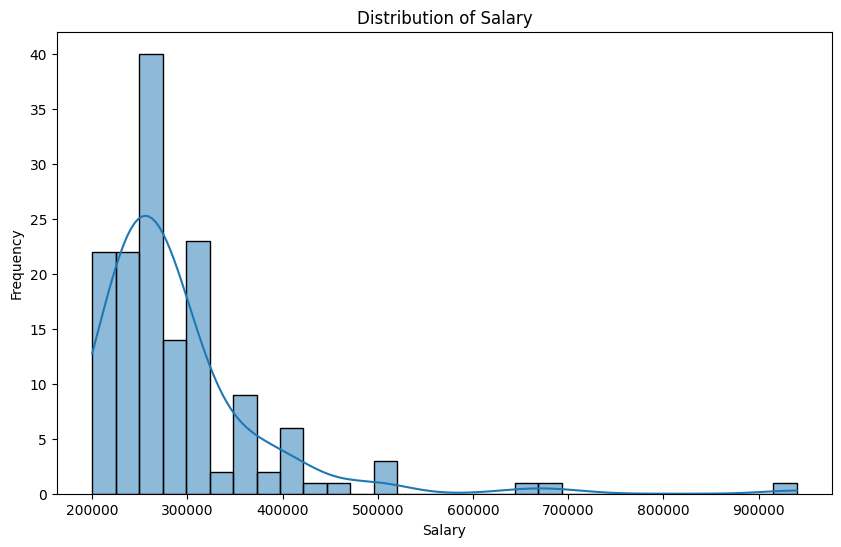

In [11]:
# Visualize the distribution of the salary data to show the skewness
plt.figure(figsize=(10, 6))
sns.histplot(data['salary'], kde=True, bins=30)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [12]:
# use the median to filling the 67 missing values which is quite small, there not affectig the entire data completely.
median_salary = data['salary'].median()
data['salary'].fillna(median_salary, inplace=True)

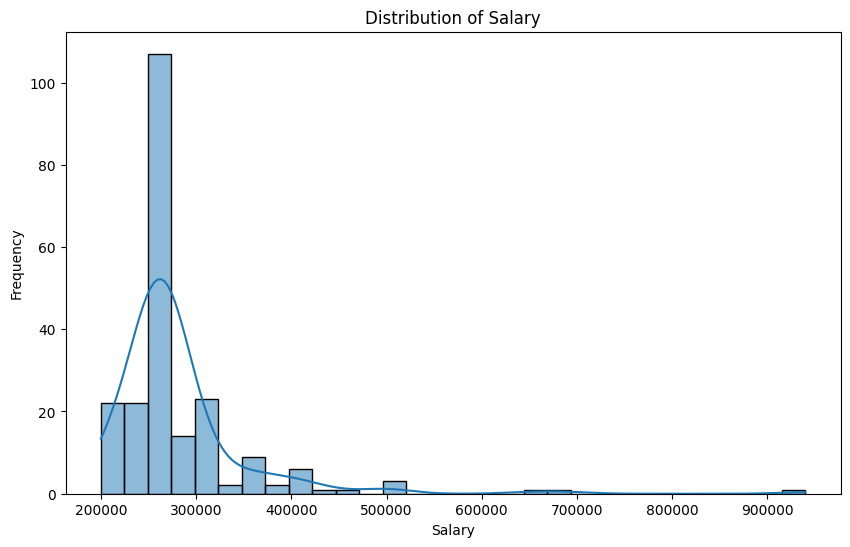

In [13]:
# Visualize the distribution of the salary feature to see how much the filling values
# skewed the feature and it was not much
plt.figure(figsize=(10, 6))
sns.histplot(data['salary'], kde=True, bins=30)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

DATA VISUALIZATION

Class distribution (counts):
status
Placed        148
Not Placed     67
Name: count, dtype: int64

Class distribution (percentage):
status
Placed        68.837209
Not Placed    31.162791
Name: proportion, dtype: float64


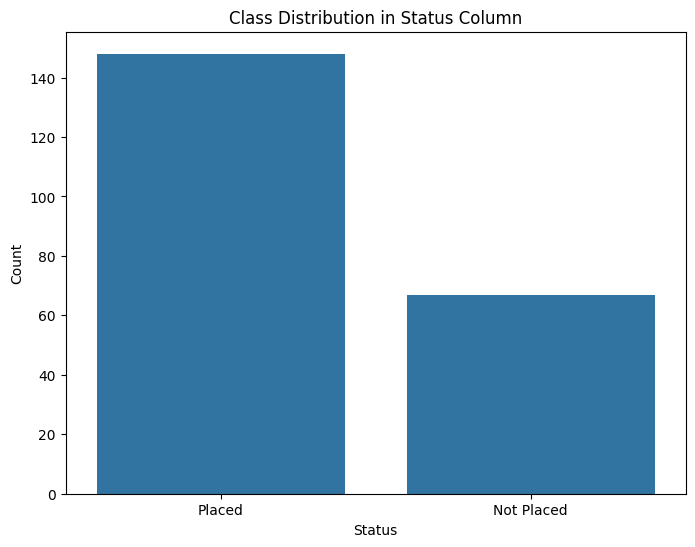

In [14]:
# First we check the feature imbalance and perhaps I will balance to improve the model.
# Check the distribution of the status column
status_counts = data['status'].value_counts()
status_percentage = data['status'].value_counts(normalize=True) * 100

# Print the distribution counts and percentages
print("Class distribution (counts):")
print(status_counts)
print("\nClass distribution (percentage):")
print(status_percentage)

# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='status', data=data)
plt.title('Class Distribution in Status Column')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

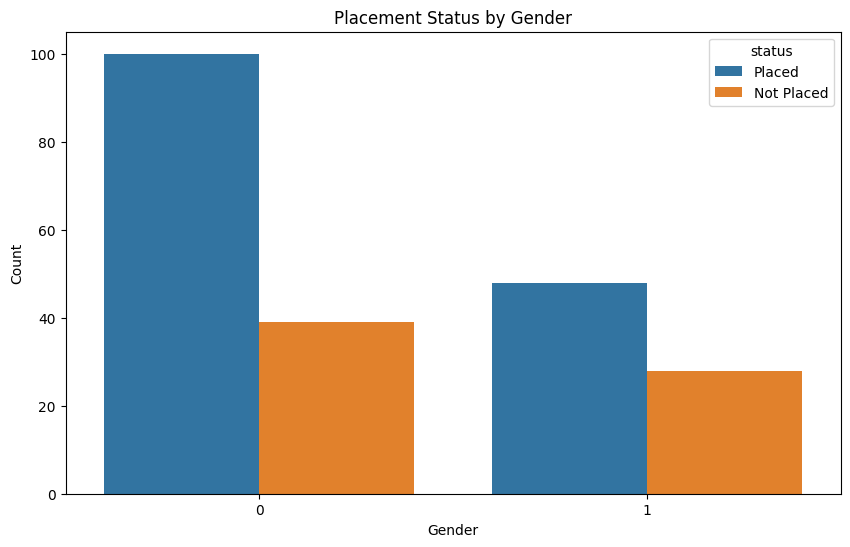

In [15]:
# Sdecod visuals is to check gender wise placement at work.
# Count plot of placement status by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='status', data=data)
plt.title('Placement Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

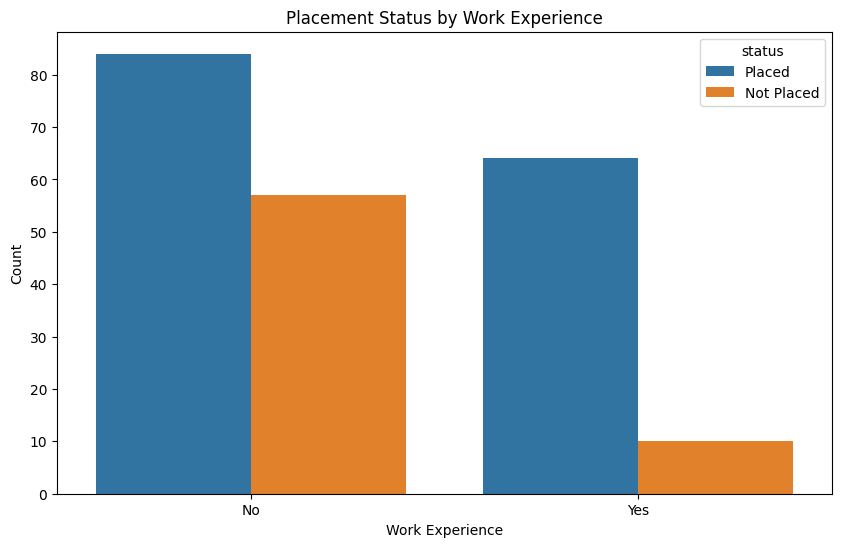

In [16]:
# third visual, work place employee with work experiences
# Count plot of placement status by work experience
plt.figure(figsize=(10, 6))
sns.countplot(x='workex', hue='status', data=data)
plt.title('Placement Status by Work Experience')
plt.xlabel('Work Experience')
plt.ylabel('Count')
plt.show()

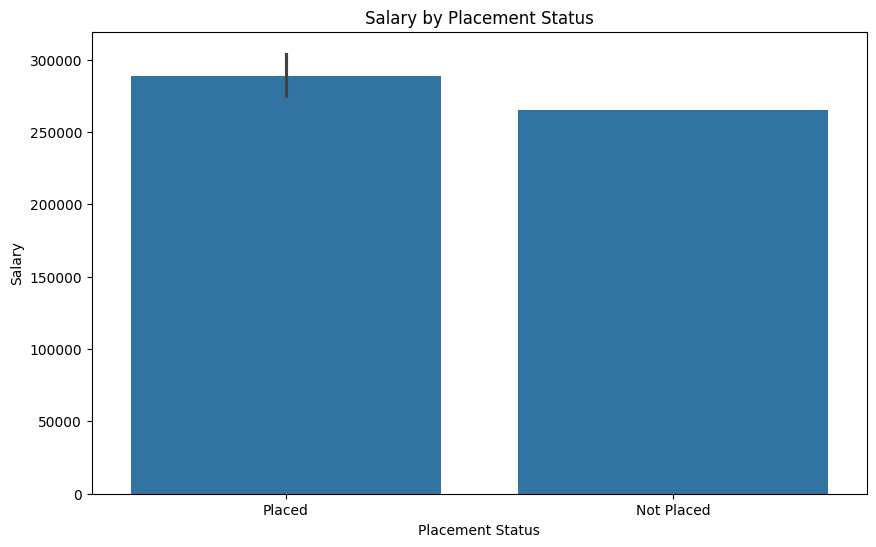

In [17]:
# fourth visual is to show salary of the placements
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='status', y='salary', data=data)
plt.title('Salary by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('Salary')
plt.show()

<Axes: >

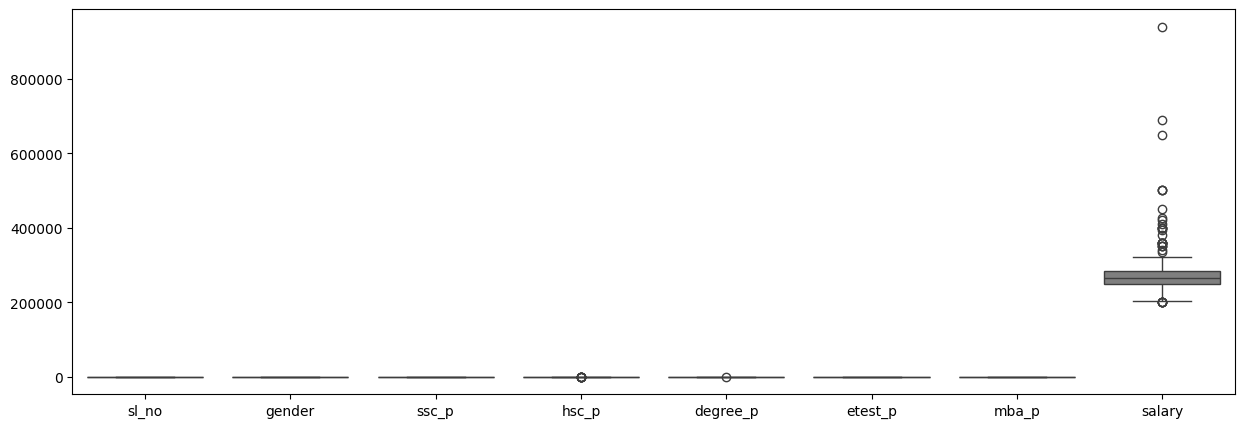

In [18]:
# fifth is to show the feature outliers. Only salary has outlier and I decided not to handle
# it because i believe an experienced person will earn higher.
plt.figure(figsize=(15,5))
sns.boxplot(data)

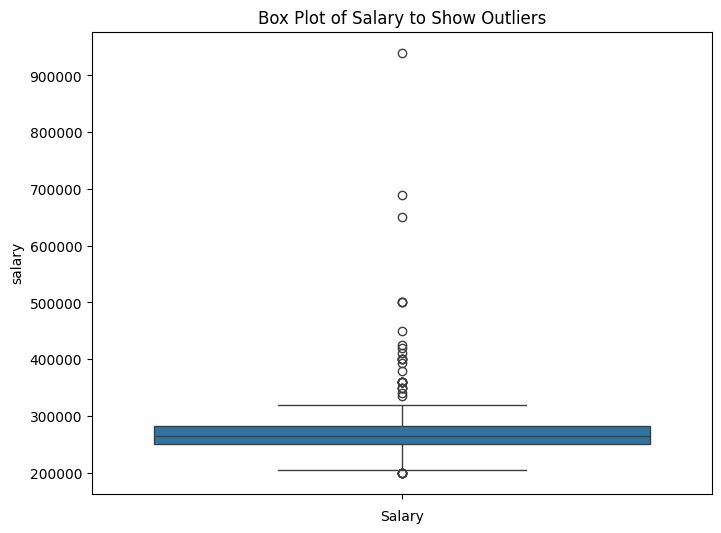

In [19]:
# Sixth visual is the box plot of Salary column, to show outliers. However since there is no business information about this feature,
# I assumend that people who are more experienced are paid heavily
# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a box plot for the salary column
sns.boxplot(data['salary'])

# Add title and labels
plt.title('Box Plot of Salary to Show Outliers')
plt.xlabel('Salary')

plt.show()

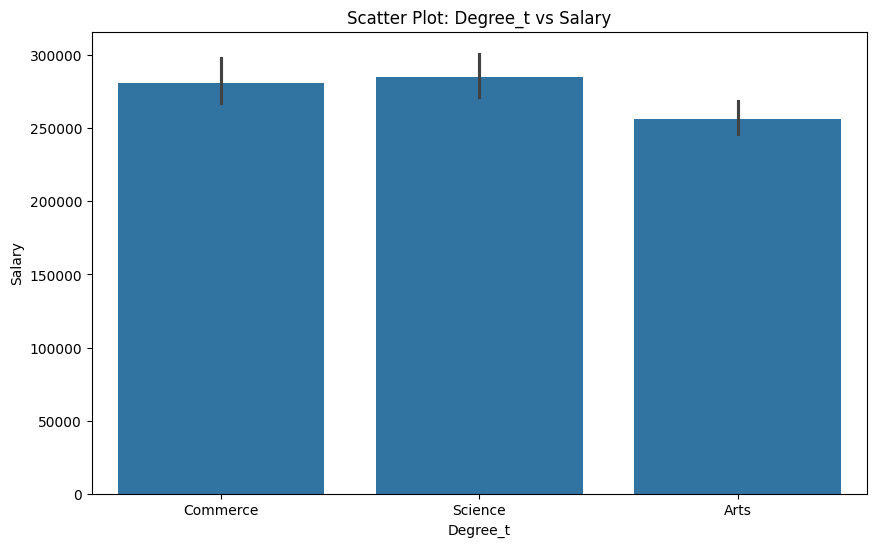

In [20]:
# Seventh visual shows earnings by degrees
# bar plot for degree_t vs salary
plt.figure(figsize=(10, 6))
sns.barplot(x=data['hsc_s'], y=data['salary'])
plt.title('Scatter Plot: Degree_t vs Salary')
plt.xlabel('Degree_t')
plt.ylabel('Salary')
plt.show()

<Figure size 1500x1000 with 0 Axes>

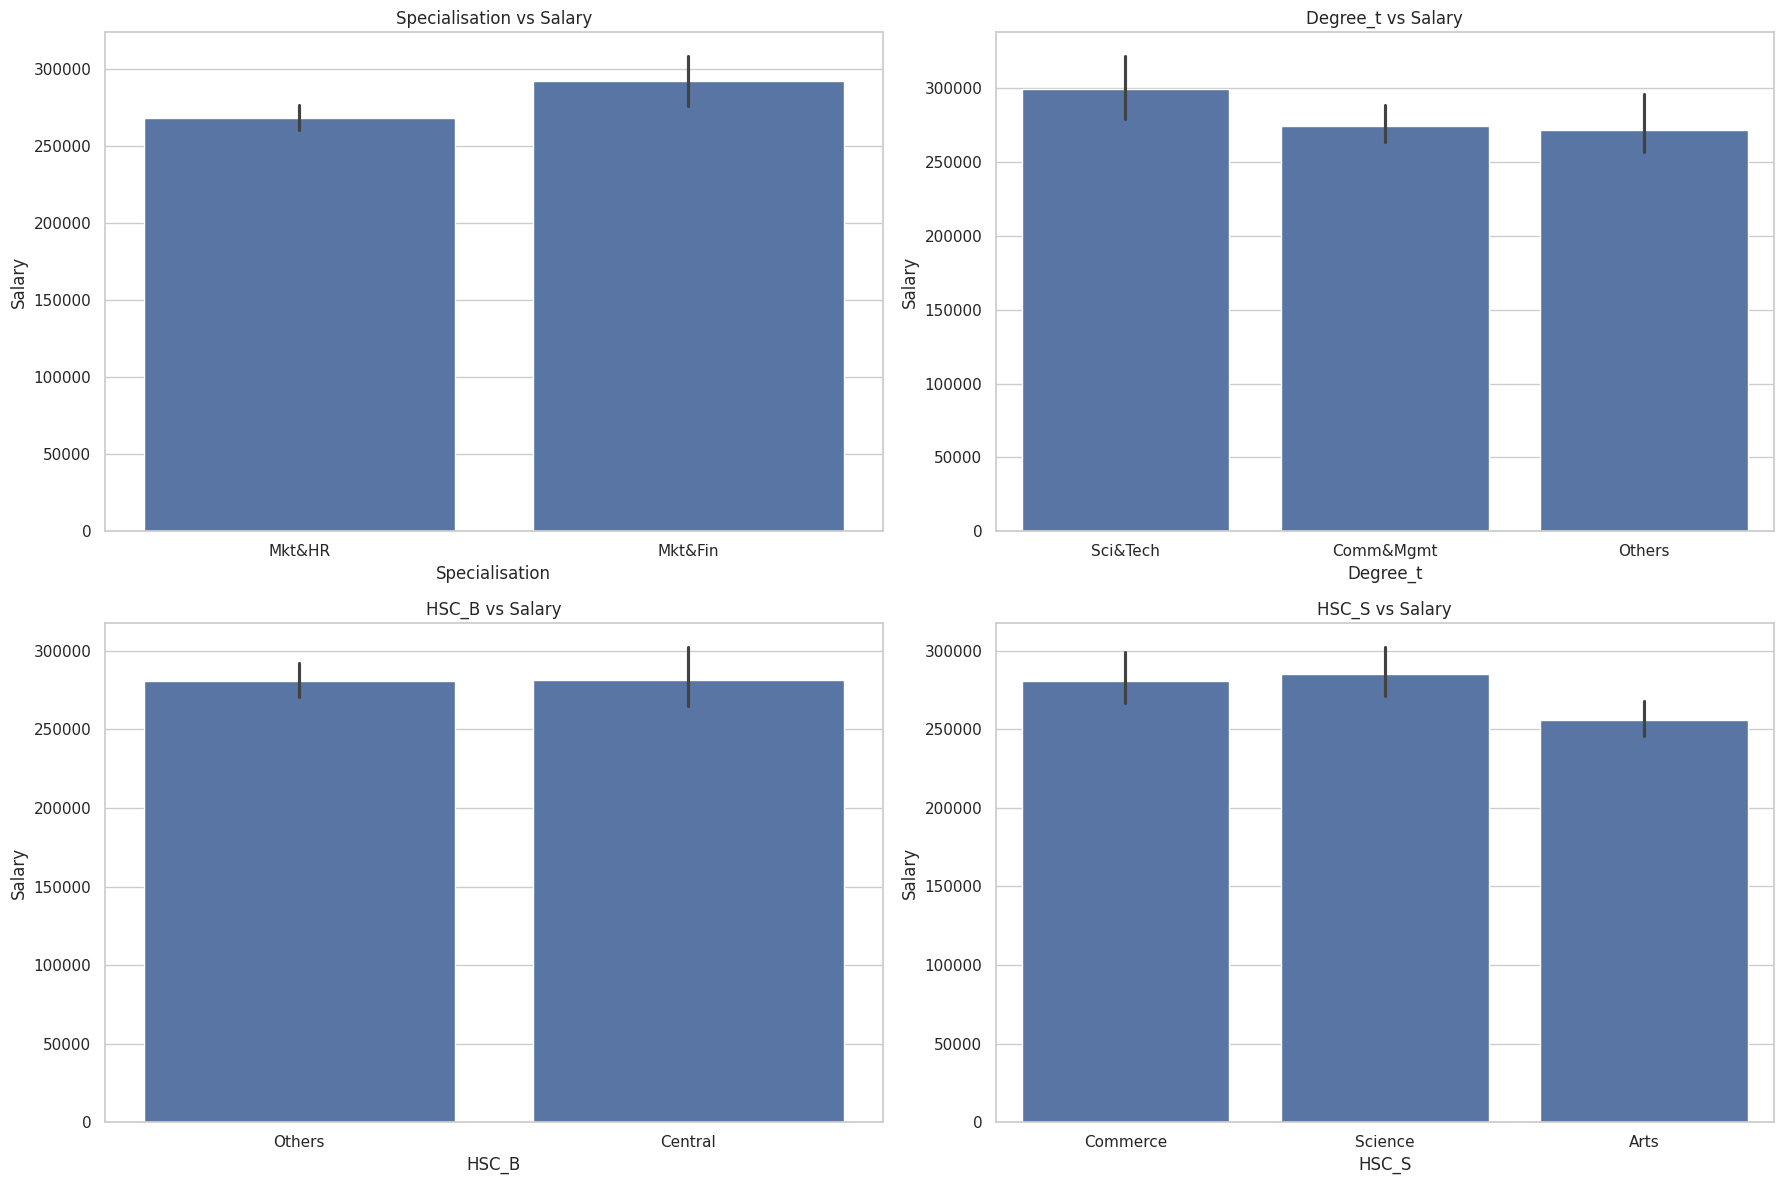

In [21]:
# Eight visuals shows the salary against different professions at one.
# Here I want visualize salariy across different professions. Scienve & Tech earns more that other professions.
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

# Create a subplot for each category
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Bar plot for specialisation vs salary
sns.barplot(ax=axs[0, 0], x=data['specialisation'], y=data['salary'])
axs[0, 0].set_title('Specialisation vs Salary')
axs[0, 0].set_xlabel('Specialisation')
axs[0, 0].set_ylabel('Salary')

# Bar plot for degree_t vs salary
sns.barplot(ax=axs[0, 1], x=data['degree_t'], y=data['salary'])
axs[0, 1].set_title('Degree_t vs Salary')
axs[0, 1].set_xlabel('Degree_t')
axs[0, 1].set_ylabel('Salary')

# Bar plot for hsc_b vs salary
sns.barplot(ax=axs[1, 0], x=data['hsc_b'], y=data['salary'])
axs[1, 0].set_title('HSC_B vs Salary')
axs[1, 0].set_xlabel('HSC_B')
axs[1, 0].set_ylabel('Salary')

# Bar plot for hsc_s vs salary
sns.barplot(ax=axs[1, 1], x=data['hsc_s'], y=data['salary'])
axs[1, 1].set_title('HSC_S vs Salary')
axs[1, 1].set_xlabel('HSC_S')
axs[1, 1].set_ylabel('Salary')

# Adjust layout
plt.tight_layout()
plt.show()

MODEL BUILDING

In [22]:
# Drop unnecessary features like sl_no which is nothing but a serial numbers
#data.drop(['sl_no'], axis=1, inplace=True)

In [23]:
# Separate features and target into x and y
X = data.drop('status', axis=1)
y = data['status']

In [24]:
# Convert categorical features to one-hot encoding,
# because I need to assign the dummies before building the model
categorical_features = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Split the data into training and testing sets (30% test data) with random state making sure that the split is consistent all the time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [25]:
# Standardize only the numerical features in the entire dataset, ignoring the categorical features.
numeric_features = X.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])



In [26]:
# Feature reduction using PCA because PCA is a technique for feature reduction based on the variance.
# Here varaince is set 75%
pca = PCA(n_components=0.80)  # Keep 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)




In [27]:
# Function to evaluate the models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    return accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='weighted'), recall_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted')

# Initialize and train the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(kernel='linear', random_state=42)
}

# Train and evaluate each model before hyperparameter tuning
results = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name} before tuning...")
    model.fit(X_train_pca, y_train)
    results[model_name] = evaluate_model(model, X_test_pca, y_test)

# Display the results
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results_df.T)

Evaluating Logistic Regression before tuning...
              precision    recall  f1-score   support

  Not Placed       0.92      0.52      0.67        21
      Placed       0.81      0.98      0.89        44

    accuracy                           0.83        65
   macro avg       0.86      0.75      0.78        65
weighted avg       0.85      0.83      0.82        65

Evaluating Decision Tree before tuning...
              precision    recall  f1-score   support

  Not Placed       0.69      0.43      0.53        21
      Placed       0.77      0.91      0.83        44

    accuracy                           0.75        65
   macro avg       0.73      0.67      0.68        65
weighted avg       0.74      0.75      0.74        65

Evaluating Random Forest before tuning...
              precision    recall  f1-score   support

  Not Placed       0.73      0.38      0.50        21
      Placed       0.76      0.93      0.84        44

    accuracy                           0.75       

In [28]:
# Perform Hyperparameter tuning for Logistic Regression using Bayesian Optimization
# because Bayesian Optimization is good for limited computation and not time consuming.

param_grid_lr = {
    'C': (1e-6, 1e+6, 'log-uniform'),
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga'],
    'max_iter': [1000]
}
bayes_search_lr = BayesSearchCV(LogisticRegression(random_state=42), param_grid_lr, n_iter=30, random_state=42)
bayes_search_lr.fit(X_train_pca, y_train)
best_lr = bayes_search_lr.best_estimator_

# Evaluate the best Logistic Regression model after hyperparameter tuning
print("Evaluating Logistic Regression after tuning...")
results['Logistic Regression Tuned'] = evaluate_model(best_lr, X_test_pca, y_test)



Evaluating Logistic Regression after tuning...
              precision    recall  f1-score   support

  Not Placed       0.85      0.52      0.65        21
      Placed       0.81      0.95      0.88        44

    accuracy                           0.82        65
   macro avg       0.83      0.74      0.76        65
weighted avg       0.82      0.82      0.80        65



In [29]:
# Hyperparameter tuning for Decision Tree using Bayesian Optimization
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
bayes_search_dt = BayesSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, n_iter=30, random_state=42)
bayes_search_dt.fit(X_train_pca, y_train)
best_dt = bayes_search_dt.best_estimator_

# Evaluate the best Decision Tree model after hyperparameter tuning
print("Evaluating Decision Tree after tuning...")
results['Decision Tree Tuned'] = evaluate_model(best_dt, X_test_pca, y_test)



Evaluating Decision Tree after tuning...
              precision    recall  f1-score   support

  Not Placed       0.75      0.57      0.65        21
      Placed       0.82      0.91      0.86        44

    accuracy                           0.80        65
   macro avg       0.78      0.74      0.75        65
weighted avg       0.79      0.80      0.79        65



In [30]:
# Hyperparameter tuning for Random Forest using Bayesian Optimization
param_grid_rf = {
    'n_estimators': (10, 1000),
    'max_depth': (1, 50),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20)
}
bayes_search_rf = BayesSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, n_iter=30, random_state=42)
bayes_search_rf.fit(X_train_pca, y_train)
best_rf = bayes_search_rf.best_estimator_

# Evaluate the best Random Forest model after hyperparameter tuning
print("Evaluating Random Forest after tuning...")
results['Random Forest Tuned'] = evaluate_model(best_rf, X_test_pca, y_test)

Evaluating Random Forest after tuning...
              precision    recall  f1-score   support

  Not Placed       0.80      0.38      0.52        21
      Placed       0.76      0.95      0.85        44

    accuracy                           0.77        65
   macro avg       0.78      0.67      0.68        65
weighted avg       0.78      0.77      0.74        65



In [46]:
# Hyperparameter tuning for SVM using Bayesian Optimization
# Due to long time tuning, a subset of training data is used for tuning.
# Limit the search space and reduce the number of iterations for SVM hyperparameter tuning
param_grid_svm = {
    'C': (1e-3, 1e+3, 'log-uniform'),
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Use a smaller subset of the training data for hyperparameter tuning
subset_size = 0.2  # Use 90% of the training data for tuning
X_train_pca_subset, _, y_train_subset, _ = train_test_split(X_train_pca, y_train, test_size=1-subset_size, random_state=42)

# Perform Bayesian Optimization on the subset
bayes_search_svm = BayesSearchCV(SVC(probability=True, random_state=42), param_grid_svm, n_iter=10, random_state=42)
bayes_search_svm.fit(X_train_pca_subset, y_train_subset)
best_svm = bayes_search_svm.best_estimator_

# Evaluate the best SVM model after hyperparameter tuning
print("Evaluating SVM after tuning...")
results['SVM Tuned'] = evaluate_model(best_svm, X_test_pca, y_test)


Evaluating SVM after tuning...
              precision    recall  f1-score   support

  Not Placed       0.81      0.62      0.70        21
      Placed       0.84      0.93      0.88        44

    accuracy                           0.83        65
   macro avg       0.82      0.78      0.79        65
weighted avg       0.83      0.83      0.82        65



Evaluating Voting Classifier...
              precision    recall  f1-score   support

  Not Placed       0.80      0.57      0.67        21
      Placed       0.82      0.93      0.87        44

    accuracy                           0.82        65
   macro avg       0.81      0.75      0.77        65
weighted avg       0.81      0.82      0.81        65

                           Accuracy  Precision    Recall  F1 Score
Logistic Regression        0.830769   0.845356  0.830769  0.815543
Decision Tree              0.753846   0.744379  0.753846  0.735143
Random Forest              0.753846   0.748925  0.753846  0.727943
SVM                        0.830769   0.845356  0.830769  0.815543
Logistic Regression Tuned  0.815385   0.820118  0.815385  0.801357
Decision Tree Tuned        0.800000   0.794898  0.800000  0.791863
Random Forest Tuned        0.769231   0.775385  0.769231  0.741108
SVM Tuned                  0.815385   0.820118  0.815385  0.801357
Voting Classifier          0.815385   

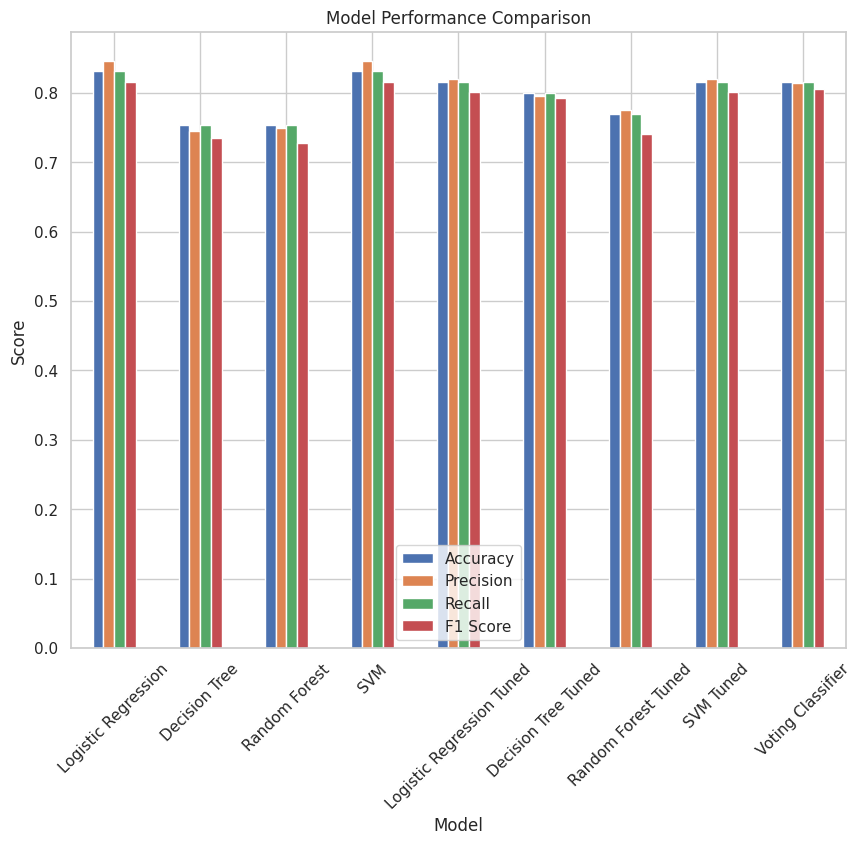

In [37]:
# Ensemble learning with Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', best_lr),
    ('dt', best_dt),
    ('rf', best_rf),
    ('svm', best_svm)
], voting='soft')
voting_clf.fit(X_train_pca, y_train)

# Evaluate the Voting Classifier
print("Evaluating Voting Classifier...")
results['Voting Classifier'] = evaluate_model(voting_clf, X_test_pca, y_test)

# Display the results after hyperparameter tuning and ensembling
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results_df.T)

# Visualize model performance
results_df.T.plot(kind='bar', figsize=(10, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()



In [ ]:
# Plot confusion matrix for the best models
ConfusionMatrixDisplay.from_estimator(best_lr, X_test_pca, y_test, display_labels=['Not Placed', 'Placed'], cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Logistic Regression')
plt.show()

ConfusionMatrixDisplay.from_estimator(best_dt, X_test_pca, y_test, display_labels=['Not Placed', 'Placed'], cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Decision Tree')
plt.show()

ConfusionMatrixDisplay.from_estimator(best_rf, X_test_pca, y_test, display_labels=['Not Placed', 'Placed'], cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Random Forest')
plt.show()

ConfusionMatrixDisplay.from_estimator(best_svm, X_test_pca, y_test, display_labels=['Not Placed', 'Placed'], cmap=plt.cm.Blues)
plt.title('Confusion Matrix: SVM')
plt.show()

ConfusionMatrixDisplay.from_estimator(voting_clf, X_test_pca, y_test, display_labels=['Not Placed', 'Placed'], cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Voting Classifier')
plt.show()

**CONCLUSION**

During hyperparameter tuning, the Logistic method metrics decreased slightly meaning that the tuning did not improve the model, however, metrics improved slightly meaning that tuning improved the model slightly. Lastly the Random Forest model had an iota improvement from the model.
The three metrics classification were strengthened by the Voting Classifier by using the strength of other models.
One thing for sure is that time did not allow to further try XGBoost, SVM and so on. I might have better performance.

**HYPERPARAMETER TUNING**

Logistics Regression: the model classified 85% “Not Placed” of the time students accurately but identified only 52% of them but did good at “Placed” student with 81% and identifying them correctly at 95%. With the harmonic mean at 88%, shows a strong model. Overfall accuracy was 82%

**Decision Tree:** this model accuracy was 80%, with its classification of “Not Placed” at 75%, identifying “Not Placed” students at 57% and harmonic mean of 65%. For “Placed” students, 82% of the students were classified and 91% of them were accurately identified with harmonic mean of 86%. This model performed comfortably and balanced but missed some “Not placed students”

**Random Forest:** among all the models, it performed with the lowest accuracy of 77% with 38% for accurately identifying “Not Placed” students but classified them accurately at 80%, the model displayed poor performance here. However, it performed better in classifying the “Placed” students at 76% of the time and identified them 95% of the time.

SVM: Due to computational time, I had to use a subset of the training data for SVM. By playing with the percentage of subset, 20% was better in terms of classifying accurately, identifying status and better harmonic mean. 81% of the time, the model classified “Not Placed” accurately, with 62% of identifying it correctly with harmonic mean of 70%. On the other hand, 84% of “Placed” was classified properly, 93% of the time identified it properly with harmonic mean of 88%. This shows that the model good with accuracy of 83%.

**Voting Classifier** combines the tune models and achieved the best accuracy of 83%, classified the “Not placed” students 81% of the time, with 62% of identifying them correctly which provided a balanced model. For “Placed” students, it classified accurately 84% of the time and identified accurately 93% of the time. With harmonic mean for both at 70% and 88%, the model delivered strong performance. Overall voting classifier showed balance performance.


**IMPROVEMENT**
During this assignment, I tried to use SMOTE to balance the target feature and drop the sl_no due to it is a serial number, however the model performed badly despite playing around with the PCA variance.
To improve the model, I must try other models with balance and imbalance target variable. Drop columns or even use multicollinearity methods to see how the model will perform.
Also, for tuning GridSearchCV can be used instead to compare performance of tunning with BayesSearchCV.
